#  Лабораторная работа 2.2
Трунов Антон М8О-304Б Вариант 16

# Задание
Реализовать методы простой итерации и Ньютона решения систем нелинейных уравнений в виде программного кода, задавая в качестве входных данных точность вычислений. С использованием разработанного программного обеспечения решить систему нелинейных уравнений (при наличии нескольких решений найти то из них, в котором значения неизвестных являются положительными); начальное приближение определить графически. Проанализировать зависимость погрешности вычислений от количества итераций.

\begin{cases}
f(x_1,x_2)=a x_1 - \cos{(x_2)} \\
f(x_1,x_2)= a x_2 - e^{x_1} \\
\end{cases}
, где $a = 2$

# Newton's method
$$
x_{n+1} = x_{n} + \Delta{x_n}
$$
где
$$
J(x_n) \Delta{x_n} = - f(x_n)
$$

Здесь $J(x_n)$ - матрица Якоби первых производных вектор-функции $f(x_n)$. Будем решать эту систему при помощи метода Зейделя.

In [5]:
import numpy as np
def seidel(A,b,eps=1e-5,maxiter=1000):#(L+D+U)x=b, Lx1+Dx1+Ux0=b,x1=-(L+D)_-1*Ux0+(L+D)_-1*b
    d = 1. / np.diag(A)
    np.fill_diagonal(A, 0)
    x0 = b * d
    x = np.copy(x0)
    for i in range(maxiter):
        for j in range(len(b)):
            x[j]=(-np.inner(A[j,:j+1],x[:j+1])-np.inner(A[j,j+1:],x0[j+1:])+b[j])*d[j]
        if np.linalg.norm(x - x0) < eps:
            return x, i
        x0 = np.copy(x)
    return x, i

def solving(f1,f2,x0):#J*dx=-b
    b = np.array([f1(x0[0],x0[1]),f2(x0[0],x0[1])],dtype=float)#(f1(x0),f2(x0)).T = -b
    J = np.array([[2,np.sin(x0[1])],[-np.exp(x0[0]),2]],dtype = float)#Jacobian
    dx, i = seidel(J,-b)
    return dx , i

def newton(x0,f1,f2,eps=1e-5,maxiter=1000):
    niter = 0
    norm = 1
    x = np.empty_like(x0)
    while norm > eps and niter < maxiter:
        dx , i = solving(f1,f2,x0)
        x = x0 + dx
        norm = np.linalg.norm(x-x0)
        x0 = np.copy(x)
        niter+=1
    return x, niter


# Fixed-point iteration
$$
x_{n+1} = \phi{(x_n)}
$$
where
$$
x_1^{n+1} = \cos{(x_2^n)} \\
x_2^{n+1} = e^{(x_1^n)}
$$

In [12]:
def phi(x0):
    phi1 = lambda x1, x2: np.cos(x2) / 2 + 0 * x1
    phi2 = lambda x1, x2: np.exp(x1) / 2 + 0 * x2
    arr = np.array([phi1(x0[0],x0[1]),phi2(x0[0],x0[1])])
    return arr

def fixedp(x0,q,eps=1e-5,maxiter=1000):
    niter = 0
    norm = 1
    x =np.empty_like(x0)
    while norm > eps and niter < maxiter:
        x = phi(x0)
        norm = np.linalg.norm(x - x0) * q/(1-q)
        x0 = np.copy(x)
        niter +=1
    return x, niter

In [15]:
f1 = lambda x1,x2 : 2*x1-np.cos(x2)
f2 = lambda x1,x2 : 2*x2-np.exp(x1)
x0 = np.array([0.3,0.6],dtype = float)
x , i = newton(x0,f1,f2)
print("Newton via Seidel:",x,"\nNumber of iterations:",i)
x , i = fixedp(x0,0.75)
print("Fixepd:",x,"\nNumber of iterations:",i)

Newton via Seidel: [0.37372792 0.72657086] 
Number of iterations: 3
Fixepd: [0.37372877 0.72657056] 
Number of iterations: 17


Определим начальное приближение $x_1^0,x_2^0$ графически.

In [8]:
import matplotlib.pyplot as plt

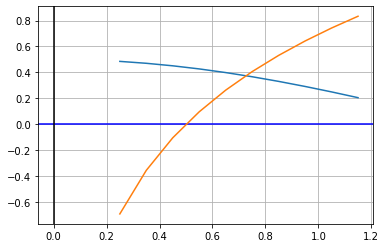

In [11]:
X = np.arange(0.25, 1.25, 0.1)  # start,stop,step
plt.axhline(0, color='blue')  # x2 = 0
plt.axvline(0, color='black')  # x1 = 0
plt.grid()
plt.plot(X, np.cos(X)/2,X,np.log(2*X))
plt.show()

Для того, чтобы найти $q$ найдем норму Якобиана $\phi{(x)}$ в области $G=\{{[0.2;0.4],[0.6;0.8]}\}$
$$
\phi'{(x)}=
\begin{bmatrix}
  \frac{\partial \phi_1}{\partial x_1} & 
    \frac{\partial \phi_1}{\partial x_2} \\
  \frac{\partial \phi_2}{\partial x_1} & 
    \frac{\partial \phi_2}{\partial x_2} \\ 
\end{bmatrix}
=
\begin{bmatrix}
  0 & -\frac{\sin{(x_2)}}{2} \\
  \frac{e^{x_1}}{2} & 0 \\ 
\end{bmatrix}
$$
$$
||\phi'{(x)}||_\infty = \max\{ \frac{e^{0.4}}{2}, \frac{\sin{(0.6)}}{2}\} \leq 0.75 = q < 1
$$